# Chapter 1: Minimum elements to consider for inclusion in a plot.

We will work out the examples using data from an absorption spectrum measurement. 

---

Import some package we need to use.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


--- 

### 1.	What are the AXES? 
- The horizontal axis represents the `INDEPENDENT VARIABLE`.  
- The vertical axis represents the VALUE of the data (`DEPENDENT VARIABLE`) for a specific value of the INDEPENDENT VARIABLE.

<p style="font-size: 12px;">
(Note: since we don’t know the values of the dataset, we cannot define the limits of the axes yet, nor should we see any ticks)</p>

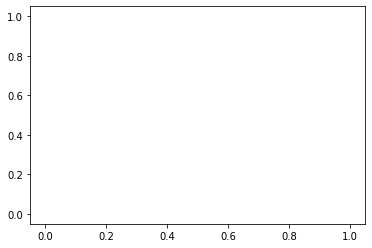

In [4]:
plt.plot()
plt.show()

### 2. Axes LABELS

Axes need to be labeled by the NAME of the quantity being measured and variable being changed. 

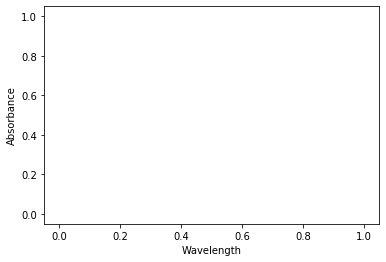

In [4]:
plt.plot()
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')
plt.show()

### 3.	UNITS

Each label has the units in parenthesis. These are the UNITS used in the measurement.  If numbers are written with scientific notation, the 10<sup>xxx</sup> could be written before the units

Example1: variable is wavelength, which can be written in nm, so draw the axis with label “Wavelength (nm)”

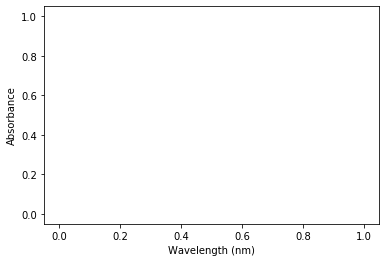

In [5]:
plt.plot()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.show()

Example 2: variable is wavelength and we want to report it in m, so draw the axis with label “Wavelength (10<sup>-9</sup> m)”

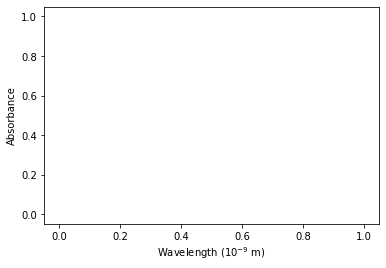

In [6]:
plt.plot()
plt.xlabel('Wavelength ($10^{-9}$ m)')
plt.ylabel('Absorbance')
plt.show()

### 4. Axes LIMITS

To properly decide how to represent the data points, we need to be sure we are maximizing the use of the available space.   Ideal graphs have the data plotted in a range such that the results occupy ~ 80 % of the graphing area.

#### 4.1 In the dataset look for the range of the `Independent Variable`.  <span style="color: red">Changed</span>
If your data has all positive values of the Independent Variable but requires that you show the value for Independent Variable =0, then start your `horizontal axis` at 0. Otherwise,   
Set the minimum value plotted for the x-axis to a value = xmin -10%  
Set the maximum value plotted for the x-axis to a value = xmax +10%   

#### 4.2.	In the dataset look for the range value of the `Dependent Variable`.  <span style="color: red">Changed</span>
If your data has all positive values of the Dependent Variable but requires that you show the value for Dependent Variable =0, then start your `vertical axis` at 0. Otherwise,  
Set the minimum value plotted for the y-axis to a value = ymin -10%  
Set the maximum value plotted for the y-axis to a value = ymax +10%   

For example, we have a table of CO2 IR Spectrum for 1 peak below. 

|wavenumber  |absorbance |
|:----------|-------------:|
|1.6000  |4.150293e-23 |
|1.6001  |4.206642e-23 |
|1.6002  |4.264802e-23 |
|...  |... |
|1.6342  |2.138367e-20 |
|...  |... |
|1.6497  |1.116959e-22 |
|1.6498  |1.102923e-22 |
|1.6499  |1.089151e-22 |

xmin = 1.6000  
xmax = 1.6499  
ymin = 4.150293e-23  
ymax = 2.138367e-20  

In [29]:
xmin = 1.6000  
xmax = 1.6499  
ymin = 4.150293e-23  
ymax = 2.138367e-20

xrange = xmax - xmin
yrange = ymax - ymin
xmin = xmin - xrange * 0.1
xmax = xmax + xrange * 0.1
ymin = ymin - yrange * 0.1
ymax = ymax + yrange * 0.1

print(xmin, xmax, ymin, ymax)

1.59501 1.65489 -2.0927137770000005e-21 2.3517886707e-20


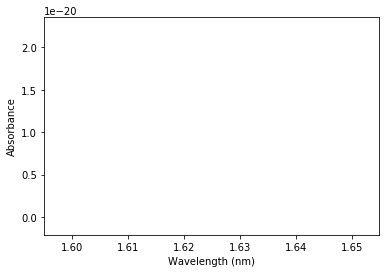

In [28]:
plt.plot()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

For absorption data, we want to plot the Absorption starting at 0

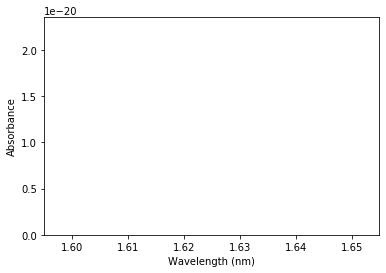

In [30]:
plt.plot()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(xmin, xmax)
plt.ylim(0, ymax)
plt.show()

### 5.	Plotting the DATAPOINTS

Now we are ready to add the datapoints.  
Data comes in many flavors; each one requires a different type of representation. 

#### 5.1. Scattered data points. 
These are discreet data points from which we don’t know (yet) the functional shape.  
For a plot with discrete points, DO NOT connect the points with lines, since those lines bear no meaning.  If all data points correspond to a measurement, then all of them should be represented by a symbol with the same color and shape. 
The symbol used for the data points need to be large enough to see them, but not too large that the actual value of the Dependent Variable might become less precise.

In [37]:
# prepare 10 data points
wavenumber = [1.6 , 1.6055, 1.6111, 1.6166, 1.6222, 1.6277, 1.6333, 1.6388, 1.6444, 1.6499]
absorbance = [4.15029336e-23, 1.84158518e-22, 1.58350762e-22, 1.15138014e-22, 2.90880985e-22, 6.31324110e-22, 1.34283525e-20, 1.17794883e-21, 2.54055012e-22, 1.08915067e-22]

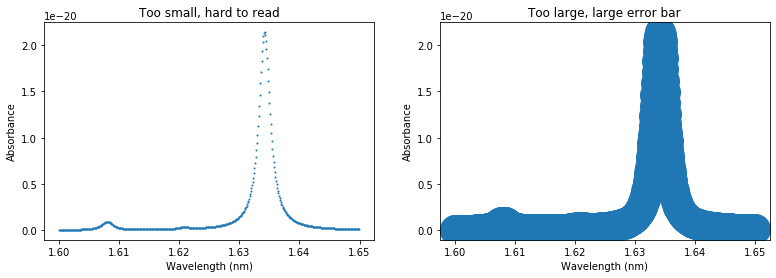

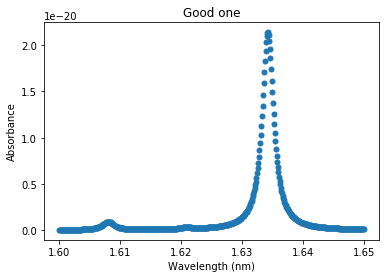

In [60]:
plt.figure(figsize=(13, 4))

# plt.subplot(total_rows, total_column, order)
# left
plt.subplot(1, 2, 1)
plt.plot(wavenumber, absorbance, 'o', markersize=1)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Too small, hard to read')
# right
plt.subplot(1, 2, 2)
plt.plot(wavenumber, absorbance, 'o', markersize=30)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Too large, large error bar')
plt.show()

# good one example
plt.plot(wavenumber, absorbance, 'o', markersize=5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Good one')
plt.show()


#### 5.2. Continuous datapoints
A plot with continuous data points is obtained when the separation between individual datapoints is smaller than the resolution between two measurements.   
When that is the case, we can have the datapoints connected by a line (which could be spline), not because we know the functional shape of the data, but because the individual datapoints are not differentiable.  We should not use a straight line through the whole data, we can only use lines between two consecutive points, or just plot the datapoint with symbols, which, if they are of reasonable size, will overlap. 

In [43]:
# prepare 500 data points
data = pd.read_csv('https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-09-25-wave_abs.csv')
wavenumber = data['wavenumber'].values
absorbance = data['absorbance'].values

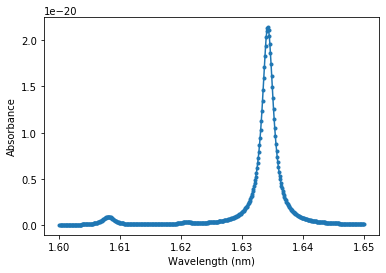

In [63]:
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.show()

Did we choose the right axes limits?  We can check this by changing the limits in the horizontal and vertical axes and seeing what happens to the data plotted. 

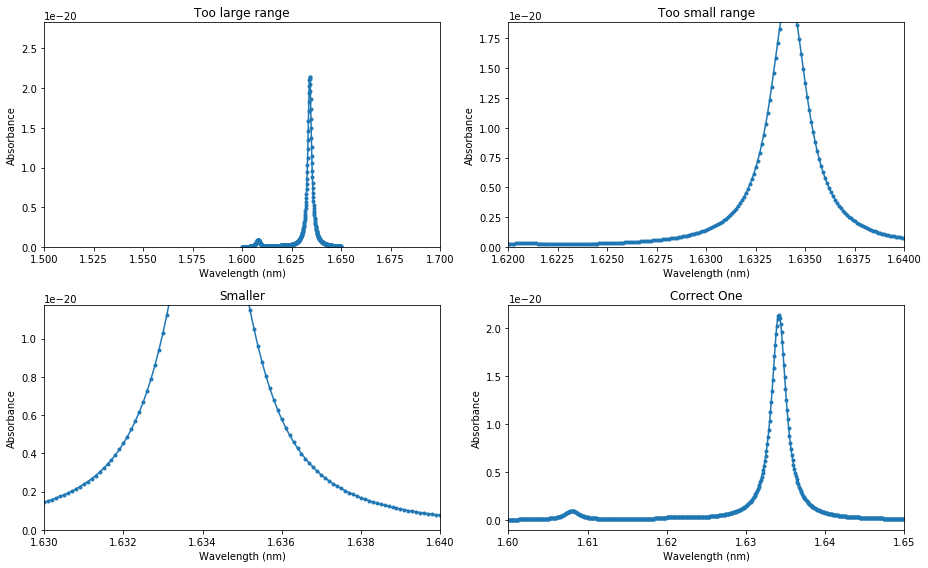

In [62]:
plt.figure(figsize=(13, 8))

# plt.subplot(total_rows, total_column, order)
# left
plt.subplot(2, 2, 1)
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(1.5, 1.7)
plt.ylim(0, ymax*1.2)
plt.title('Too large range')

# right
plt.subplot(2, 2, 2)
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(1.62, 1.64)
plt.ylim(0, ymax*0.8)
plt.title('Too small range')

# left
plt.subplot(2, 2, 3)
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(1.63, 1.64)
plt.ylim(0, ymax*0.5)
plt.title('Smaller')

# right
plt.subplot(2, 2, 4)
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(1.60, 1.65)
# plt.ylim(0, ymax)
plt.title('Correct One')

plt.tight_layout()
plt.show()

#### 6.	 REVISED Axes Limits  
Once the full range of the graph is well defined and chosen, go back to [#4 (Axes limits)](#4.-Axes-LIMITS) and look for integer values near the ideal limits of your plots.  Change the limits to these values, just to make it easier on the eye of the reader. 

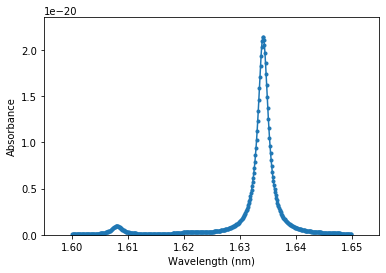

In [82]:
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(xmin, xmax)
plt.ylim(0, ymax)
plt.show()

#### 7.	Axes TICK MARKS
Add ticks to each axis, such that you divide the full range in about 5 or 6 equally spaced regions.  If you want to show a grid, these ticks will define the positions of the grid lines.  If you add too many tick marks, the labels of the tick mark will overlap, making it hard to read, if you add too few, it makes it hard to gauge the position of datapoints in between tick marks.   Add the labels of those tick marks. Use a font size smaller than the Axes label, but large enough that it can be easily (usually the same font size as the rest of document you are preparing, 10- 12 pt).

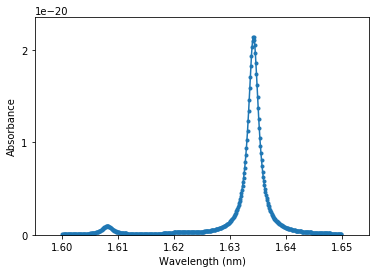

In [74]:
plt.plot(wavenumber, absorbance, 'o-', markersize=3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(xmin, xmax)
plt.ylim(0, ymax)
plt.xticks(np.arange(1.60, 1.66, 0.01))
plt.yticks(np.arange(0.0e-20, 2.1e-20, 1.0e-20))
plt.show()

#### 8.	Title and Legend
At the end, we must include a Title and legend for the plot.

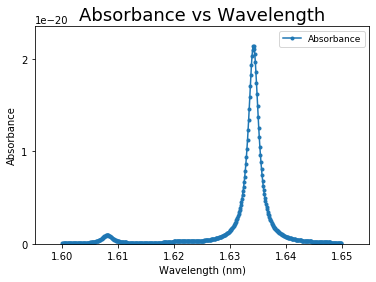

In [81]:
plt.plot(wavenumber, absorbance, 'o-', markersize=3, label='Absorbance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.xlim(xmin, xmax)
plt.ylim(0, ymax)
plt.xticks(np.arange(1.60, 1.66, 0.01))
plt.yticks(np.arange(0.0e-20, 2.1e-20, 1.0e-20))
plt.title('Absorbance vs Wavelength',  fontsize=18)
plt.legend(fontsize=9)
plt.show()